In [1]:
import os, sys
BASE_PATH = os.path.dirname(os.path.abspath(''))
sys.path.append(BASE_PATH)

# Create folds spacenet dataset

In [15]:
import pickle

from datagen.create_folds import get_fp_orient, cluster, get_cluster_fp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
base_dir = '../../image_folder/AOI_11_Rotterdam'
folds = 5

fps0 = get_fp_orient(base_dir, 0)
fps1 = get_fp_orient(base_dir, 1)

total timestamps: 204
timestamps with orientation 0: 102
total SAR images with orientation 0: 1749
total timestamps: 204
timestamps with orientation 1: 102
total SAR images with orientation 1: 1652


In [5]:
# combine 0 and 1 fps, but remember their start idx
comb_fps = []
for fp in fps0:
    comb_fps.append(fp)
    
for fp in fps1:
    comb_fps.append(fp)

print(f'total tiles: {len(comb_fps)}')

total tiles: 3401


In [10]:
midx, midy, y_kmeans = cluster(comb_fps, n_fold=folds)
print('Cluster distribution :')
print(np.unique(y_kmeans, return_counts=1))

Cluster distribution :
(array([0, 1, 2, 3, 4], dtype=int32), array([588, 712, 682, 668, 751]))


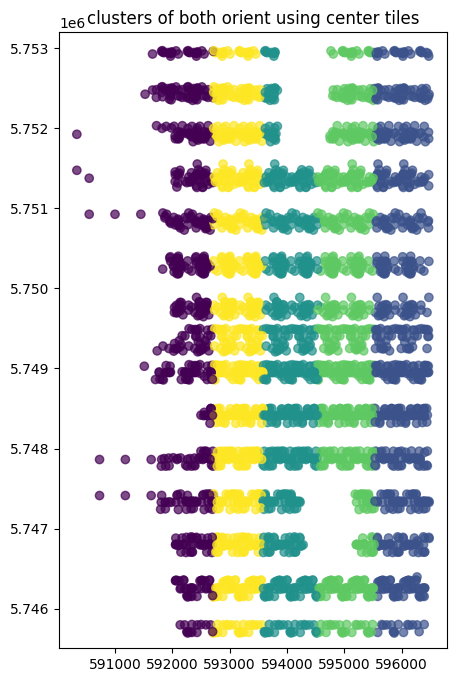

In [14]:
f,ax = plt.subplots(1,1,figsize=(5,8))
ax.scatter(midx, midy, c=y_kmeans, alpha=0.7)
ax.set_title('clusters of both orient using center tiles')
ax.set_ylim([5745505, 5753200])
plt.show()

In [16]:
# splitting the folds based on orient
y_kmeans0 = y_kmeans[:1749]
y_kmeans1 = y_kmeans[1749:]
print(len(y_kmeans0))
print(len(y_kmeans1))

1749
1652


In [17]:
fps0_folds = get_cluster_fp(folds, y_kmeans0, fps0)
fps1_folds = get_cluster_fp(folds, y_kmeans1, fps1)

Cluster distribution :
(array([0, 1, 2, 3, 4], dtype=int32), array([245, 386, 397, 347, 374]))
Cluster distribution :
(array([0, 1, 2, 3, 4], dtype=int32), array([343, 326, 285, 321, 377]))


In [ ]:
# save pickle in this directory
with open('fps0_5folds.pickle', 'wb') as f:
    pickle.dump(fps0_folds, f)

with open('fps1_5folds.pickle', 'wb') as f:
    pickle.dump(fps1_folds, f)

# Saved folds

In [5]:
orient = 0

with open(f'../datasets/fps{orient}_5folds.pickle', 'rb') as fp:
    fps_folds0 = pickle.load(fp)

for i,fold in enumerate(fps_folds0):
    print(f'fold {i}: {len(fold)}')

fold 0: 397
fold 1: 386
fold 2: 245
fold 3: 347
fold 4: 374
